In [1]:
import pandas as pd
url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

df.famhist = pd.Categorical(df.famhist).codes

In [2]:
print(df.isnull().sum().rename('Count of missing values').to_latex())

\begin{tabular}{lr}
\toprule
 & Count of missing values \\
\midrule
sbp & 0 \\
tobacco & 0 \\
ldl & 0 \\
adiposity & 0 \\
famhist & 0 \\
typea & 0 \\
obesity & 0 \\
alcohol & 0 \\
age & 0 \\
chd & 0 \\
\bottomrule
\end{tabular}



In [3]:
min_values = df.min()
max_values = df.max()

# Combine results into a single DataFrame
ranges = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(ranges.to_latex())

\begin{tabular}{lrr}
\toprule
 & Min & Max \\
\midrule
sbp & 101.000000 & 218.000000 \\
tobacco & 0.000000 & 31.200000 \\
ldl & 0.980000 & 15.330000 \\
adiposity & 6.740000 & 42.490000 \\
famhist & 0.000000 & 1.000000 \\
typea & 13.000000 & 78.000000 \\
obesity & 14.700000 & 46.580000 \\
alcohol & 0.000000 & 147.190000 \\
age & 15.000000 & 64.000000 \\
chd & 0.000000 & 1.000000 \\
\bottomrule
\end{tabular}



In [4]:
# Convert binary text data to numbered categories
df['famhist'] = pd.Categorical(df['famhist']).codes

# Extract the name of the attributes (columns)
attributeNames = list(map(lambda x: x.capitalize(), df.columns.tolist()))
X = df.to_numpy()

# Compute values of M
M = len(attributeNames)
N = len(X)


In [5]:
df.mean()

sbp          138.326840
tobacco        3.635649
ldl            4.740325
adiposity     25.406732
famhist        0.415584
typea         53.103896
obesity       26.044113
alcohol       17.044394
age           42.816017
chd            0.346320
dtype: float64

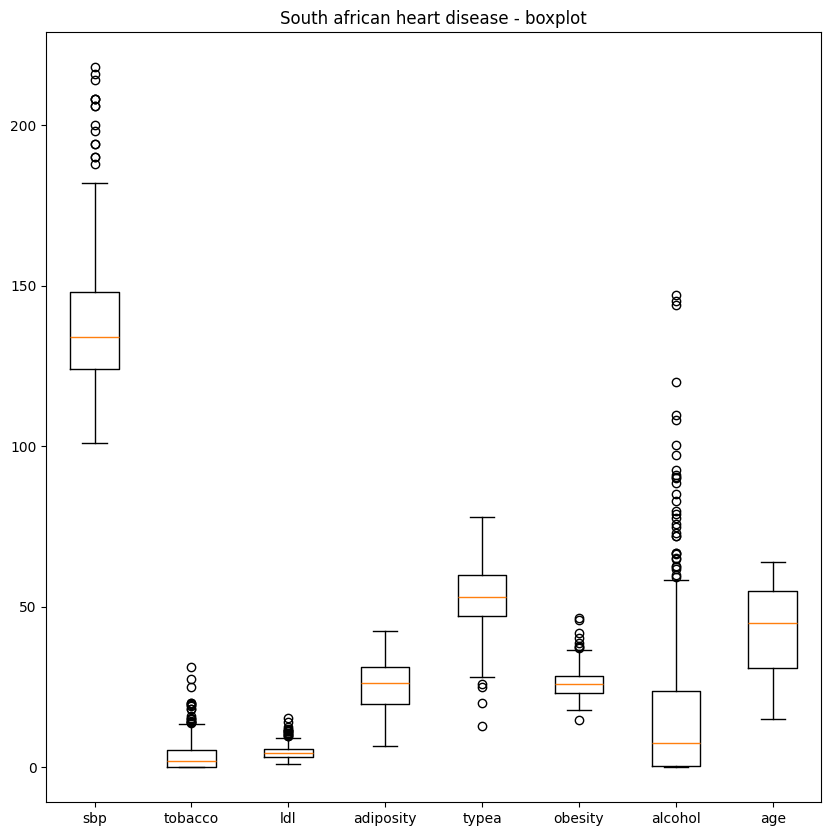

In [6]:
import matplotlib.pyplot as plt
X_plot = df.copy().drop(df.columns[[4, 9]],axis=1)
plt.figure(figsize=(10, 10))
plt.boxplot(X_plot)
plt.xticks(range(1, X_plot.shape[1] +1), X_plot.columns)
plt.title("South african heart disease - boxplot")
plt.show()




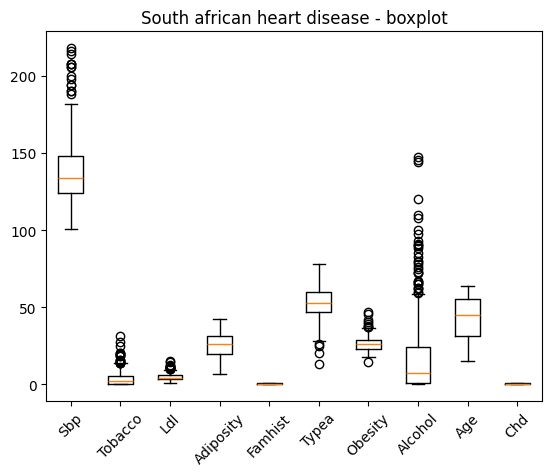

In [7]:
plt.figure()
plt.boxplot(X)
plt.xticks(range(1, M + 1), attributeNames, rotation=45)
plt.title("South african heart disease - boxplot")
plt.show()

/var/folders/cx/dh_rvhrj5656q86nbjpkb89c0000gn/T/ipykernel_21889/3293323026.py:4: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(zscore(X, ddof=1), attributeNames)


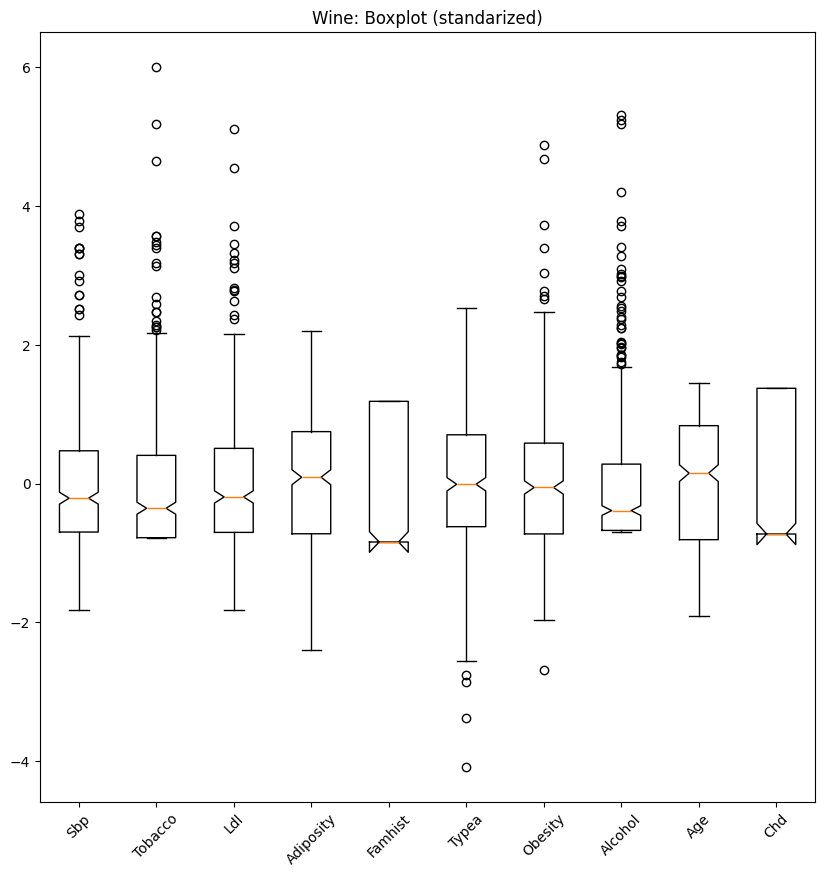

In [8]:
from scipy.stats import zscore
plt.figure(figsize=(10,10))
plt.title("Wine: Boxplot (standarized)")
plt.boxplot(zscore(X, ddof=1), attributeNames)
plt.xticks(range(1, M + 1), attributeNames, rotation=45)
plt.show()

In [9]:
df.var()

sbp          420.099018
tobacco       21.095870
ldl            4.288665
adiposity     60.539271
famhist        0.243401
typea         96.383976
obesity       17.755101
alcohol      599.322235
age          213.421608
chd            0.226874
dtype: float64

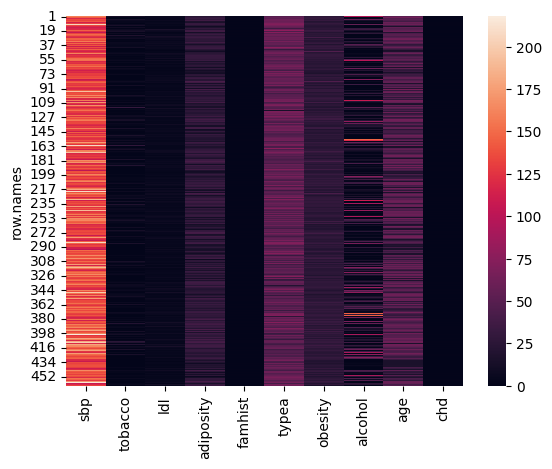

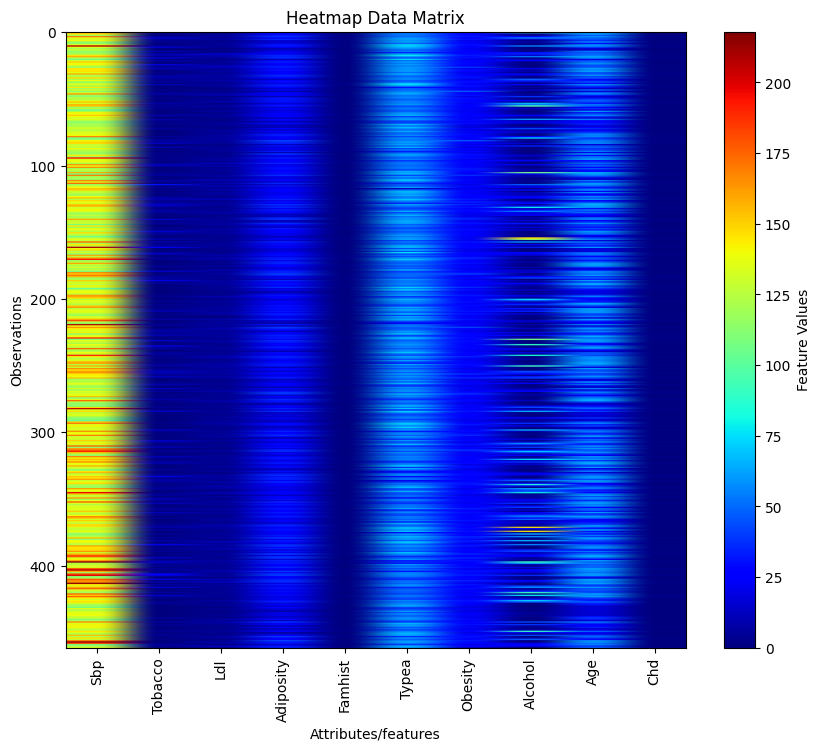

In [13]:
import seaborn as sns
import numpy as np
sns.heatmap(df)

attribute_names = list(map(lambda x: x.capitalize(), df.columns.tolist()))

fig = plt.figure(figsize=(10, 8))
plt.imshow(X, aspect='auto', cmap='jet')
plt.colorbar(label='Feature Values')
plt.title('Heatmap Data Matrix')

plt.xticks(ticks=np.arange(len(attribute_names)), labels=attribute_names, rotation="vertical")
#plt.xticks(ticks=np.arange(len(attribute_names)), labels=wine_id_type, fontsize=4)
plt.xlabel('Attributes/features')
plt.ylabel('Observations')
plt.show()


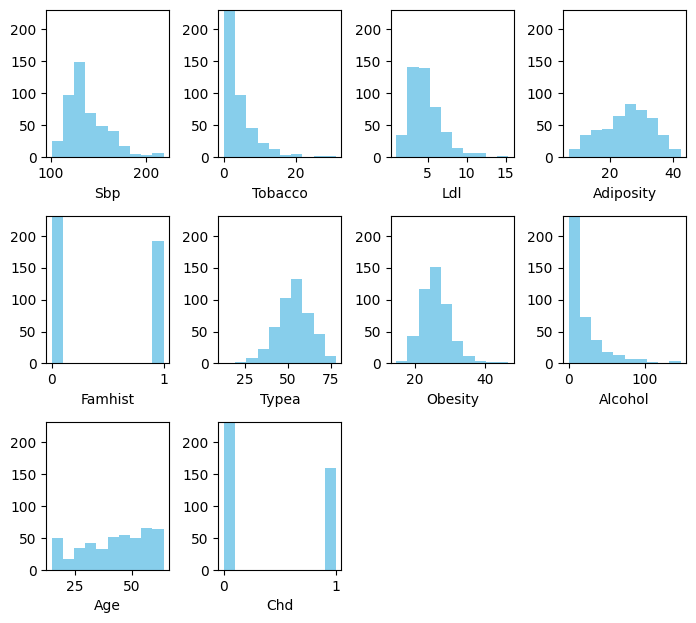

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 7))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i], color="skyblue")
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.subplots_adjust(left=0.1, right=0.9,
                    top=0.9, bottom=0.1,
                    wspace=0.4, hspace=0.4)
plt.show()

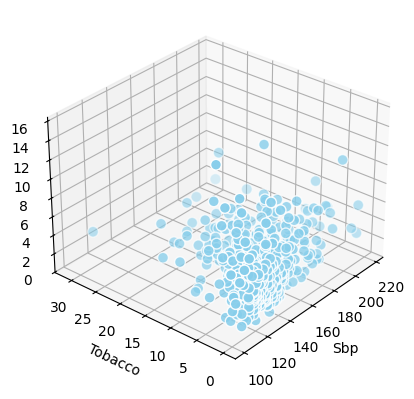

In [15]:
ind = [0, 1, 2]
colors = ["blue", "green", "red"]

f = plt.figure()
ax = f.add_subplot(111, projection="3d")  # Here the mpl_toolkits is used
s = ax.scatter(
        X[:, ind[0]], X[:, ind[1]], X[:, ind[2]], c="skyblue", s=60, edgecolors="w"
    )

ax.view_init(30, 220)
ax.set_xlabel(attributeNames[ind[0]])
ax.set_ylabel(attributeNames[ind[1]])
ax.set_zlabel(attributeNames[ind[2]])

plt.show()

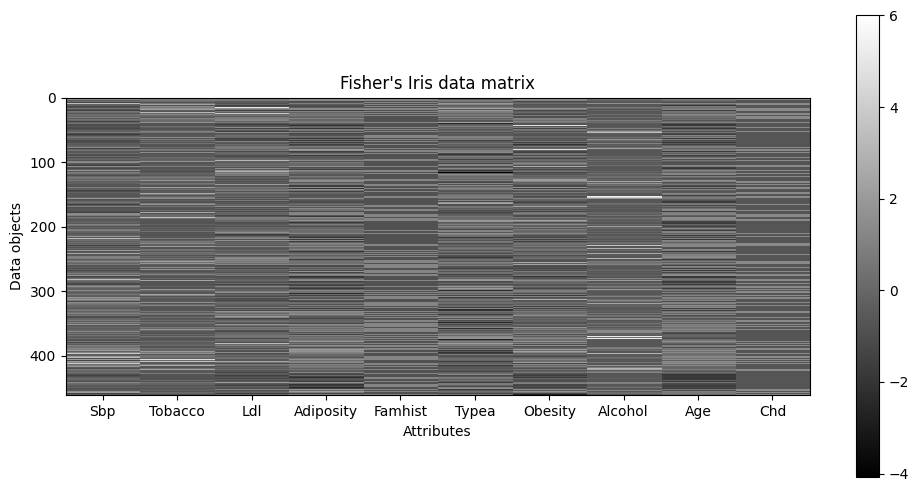

Ran Exercise 2.3.7


In [16]:
from scipy.stats import zscore

X_standarized = zscore(X, ddof=1)

plt.figure(figsize=(12, 6))
plt.imshow(X_standarized, interpolation="none", aspect=(4.0 / N), cmap=plt.cm.gray)
plt.xticks(range(len(attributeNames)), attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Data objects")
plt.title("Fisher's Iris data matrix")
plt.colorbar()

plt.show()

print("Ran Exercise 2.3.7")

NameError: name 'y' is not defined

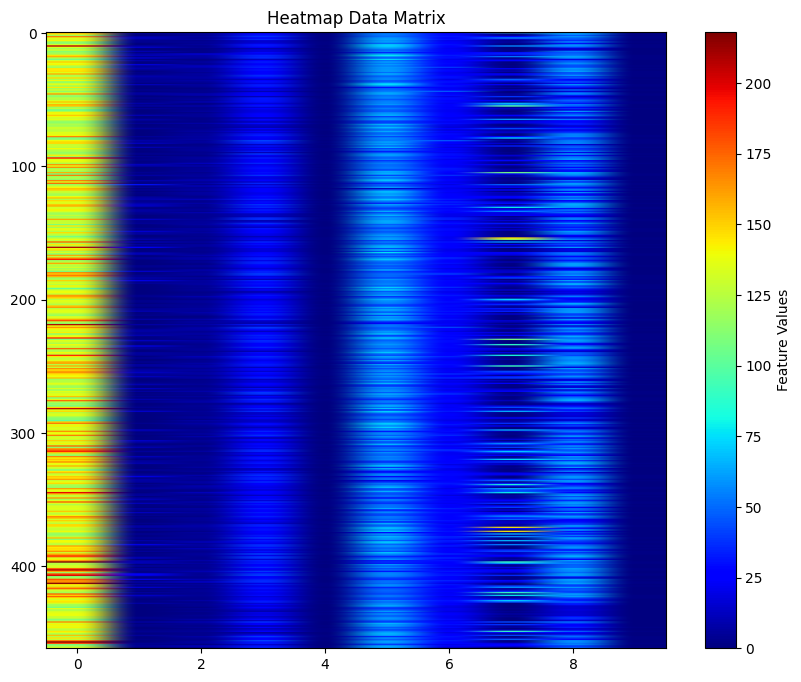

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(X, aspect='auto', cmap='jet')
plt.colorbar(label='Feature Values')
plt.title('Heatmap Data Matrix')
plt.yticks(ticks=np.arange(len(y)), labels=wine_id_type, fontsize=4)
plt.xticks(ticks=np.arange(len(attribute_names)), labels=attribute_names, rotation="vertical")
#plt.xticks(ticks=np.arange(len(attribute_names)), labels=wine_id_type, fontsize=4)
plt.xlabel('Attributes/features')
plt.ylabel('Observations')
plt.show()